## Covid-19 Fake news Detection - Modelling

### Importing required library

In [111]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
import numpy as np
import itertools
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, classification_report, precision_score

### Loading dataset and giving name to columns

In [2]:
df=pd.read_csv('covidnews.txt', sep="\t", header=None)
df.columns = ["label", "text"]

In [3]:
df.head()

,label,text
0,0,live launch of the access to covid tools act...
1,0,live one world togetherathome covid
2,1,dettol kills the coronavirus so it is not new
3,1,one thing for sure drink enough bleach and t...
4,1,isn t that horrible china has a patent on th...


In [4]:
# counting the number of missing values in the dataset
df.isnull().sum()

label    0
text     0
dtype: int64

### Defining a function for Preprocessing the data using NLP 

In [5]:
port_stem = PorterStemmer()
def stemming(content):
    stemmed_content = re.sub('[^a-zA-Z]',' ',content)
    stemmed_content = stemmed_content.lower()
    stemmed_content = stemmed_content.split()
    stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
    stemmed_content = ' '.join(stemmed_content)
    return stemmed_content

In [6]:
df['text'] = df['text'].apply(stemming)

In [7]:
df['text'][50]

'mcgarri report bill gate predict coronaviru like outbreak'

In [8]:
df['text']

0                live launch access covid tool act acceler
1                       live one world togetherathom covid
2                               dettol kill coronaviru new
3        one thing sure drink enough bleach coronaviru ...
4        horribl china patent viru alreadi laboratori b...
                               ...                        
21995    get latest updat covid respons massachusett st...
21996                 hold brief covid virginia watch live
21997    mani countri put place restrict measur physic ...
21998    expert hand sanitis made alcohol kill coronavi...
21999    salli c pipe warren schakowski bill would push...
Name: text, Length: 22000, dtype: object

label
0    11000
1    11000
Name: text, dtype: int64


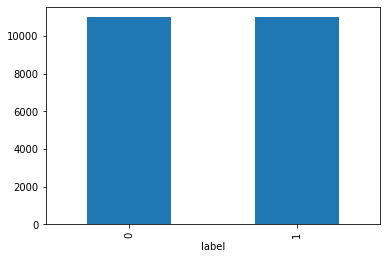

In [9]:
print(df.groupby(['label'])['text'].count())
df.groupby(['label'])['text'].count().plot(kind="bar")
plt.show()

### Defining dependent and independent variable as X and Y

In [10]:
#separating the data and label
X = df['text'].values
Y = df['label'].values

In [11]:
X.shape

(22000,)

### Convert text to vectors by TfidfVectorizer

In [12]:
# converting the textual data to numerical data
vectorizer = TfidfVectorizer()
vectorizer.fit(X)

X = vectorizer.transform(X)

In [13]:
X.shape

(22000, 15970)

### Splitting the dataset into training set and testing set. 

In [14]:
## Divide the dataset into Train and Test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify=Y, random_state=2)

### Defining a function to plot the confusion matrix

In [15]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### Start Modelling

### 1-Logistic Regression

In [16]:
lr_model = LogisticRegression()
lr_model.fit(X_train, Y_train)

LogisticRegression()

In [17]:
# accuracy score on the training data
X_train_prediction = lr_model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.9808522727272727


In [18]:
# accuracy score on the test data
X_test_prediction = lr_model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.9713636363636363


accuracy:   0.971364
f1_score:   0.971364
Confusion matrix, without normalization


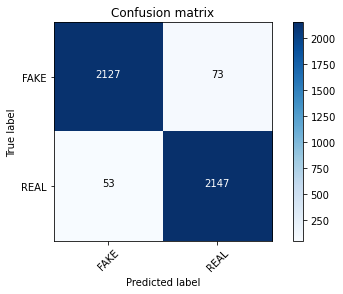

In [51]:
lr_model.fit(X_train, Y_train)
pred = lr_model.predict(X_test)
score = metrics.accuracy_score(Y_test, pred)
print("accuracy:   %f" % score)
f1 = f1_score(Y_test, pred, average='micro')
print("f1_score:   %f" % f1)
cm = metrics.confusion_matrix(Y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [103]:
print(classification_report(Y_test, pred, digits=4))

              precision    recall  f1-score   support

           0     0.9757    0.9668    0.9712      2200
           1     0.9671    0.9759    0.9715      2200

    accuracy                         0.9714      4400
   macro avg     0.9714    0.9714    0.9714      4400
weighted avg     0.9714    0.9714    0.9714      4400



### 2-MultinomialNB

In [21]:
mnb_clf=MultinomialNB()

accuracy:   0.933
Confusion matrix, without normalization


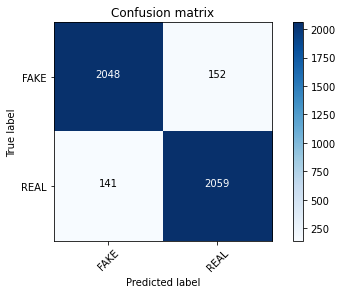

In [53]:
mnb_clf.fit(X_train, Y_train)
mnb_pred = mnb_clf.predict(X_test)
score = metrics.accuracy_score(Y_test, mnb_pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(Y_test, mnb_pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [23]:
mnb_clf.fit(X_train, Y_train)
mnb_pred = mnb_clf.predict(X_test)
score = metrics.accuracy_score(Y_test, mnb_pred)
score

0.9334090909090909

In [24]:
# accuracy score on the training data
X_train_prediction = mnb_clf.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.954659090909091


In [104]:
print(classification_report(Y_test, mnb_pred, digits=4))

              precision    recall  f1-score   support

           0     0.9356    0.9309    0.9332      2200
           1     0.9313    0.9359    0.9336      2200

    accuracy                         0.9334      4400
   macro avg     0.9334    0.9334    0.9334      4400
weighted avg     0.9334    0.9334    0.9334      4400



In [25]:
Y_train.shape

(17600,)

In [32]:
classifier=MultinomialNB(alpha=0.1)

In [33]:
previous_score=0
for alpha in np.arange(0,1,0.1):
    sub_classifier=MultinomialNB(alpha=alpha)
    sub_classifier.fit(X_train,Y_train)
    Y_pred=sub_classifier.predict(X_test)
    score = metrics.accuracy_score(Y_test, Y_pred)
    if score>previous_score:
        classifier=sub_classifier
    print("Alpha: {}, Score : {}".format(alpha,score))

Alpha: 0.0, Score : 0.9022727272727272
Alpha: 0.1, Score : 0.9275
Alpha: 0.2, Score : 0.93
Alpha: 0.30000000000000004, Score : 0.9302272727272727
Alpha: 0.4, Score : 0.9302272727272727
Alpha: 0.5, Score : 0.9315909090909091
Alpha: 0.6000000000000001, Score : 0.9315909090909091
Alpha: 0.7000000000000001, Score : 0.9318181818181818
Alpha: 0.8, Score : 0.9327272727272727
Alpha: 0.9, Score : 0.9331818181818182


C:\Users\monak\anaconda3\envs\blhl\lib\site-packages\sklearn\naive_bayes.py:557: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  % _ALPHA_MIN


### 3-PassiveAggressiveClassifier

In [98]:
#pa_clf = PassiveAggressiveClassifier()
pa_clf = PassiveAggressiveClassifier(C = 0.1, max_iter=10000, random_state=0, tol=1e-3)

accuracy:   0.976
Confusion matrix, without normalization


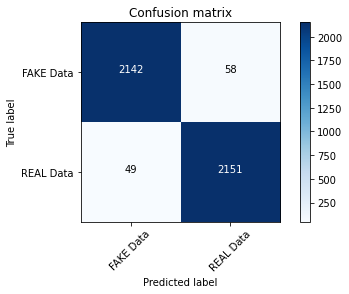

In [99]:
pa_clf.fit(X_train, Y_train)
pa_pred = pa_clf.predict(X_test)
score = metrics.accuracy_score(Y_test, pa_pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(Y_test, pa_pred)
plot_confusion_matrix(cm, classes=['FAKE Data', 'REAL Data'])

In [100]:
# accuracy score on the training data
X_train_prediction = pa_clf.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.9956818181818182


In [105]:
print(classification_report(Y_test, pa_pred, digits=4))

              precision    recall  f1-score   support

           0     0.9776    0.9736    0.9756      2200
           1     0.9737    0.9777    0.9757      2200

    accuracy                         0.9757      4400
   macro avg     0.9757    0.9757    0.9757      4400
weighted avg     0.9757    0.9757    0.9757      4400



### 4-DecisionTreeClassifier

In [29]:
dt_clf = DecisionTreeClassifier()

accuracy:   0.974
Confusion matrix, without normalization


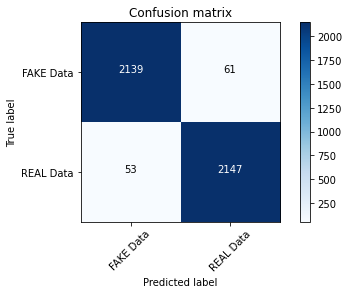

In [30]:
dt_clf.fit(X_train, Y_train)
dt_pred = dt_clf.predict(X_test)
score = metrics.accuracy_score(Y_test, dt_pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(Y_test, dt_pred)
plot_confusion_matrix(cm, classes=['FAKE Data', 'REAL Data'])

In [31]:
# accuracy score on the training data
X_train_prediction = dt_clf.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.9999431818181819


In [106]:
print(classification_report(Y_test, dt_pred, digits=4))

              precision    recall  f1-score   support

           0     0.9758    0.9723    0.9740      2200
           1     0.9724    0.9759    0.9741      2200

    accuracy                         0.9741      4400
   macro avg     0.9741    0.9741    0.9741      4400
weighted avg     0.9741    0.9741    0.9741      4400



### 5-GradientBoostingClassifier

In [33]:
gb_clf = GradientBoostingClassifier(random_state=0)

accuracy:   0.971
Confusion matrix, without normalization
Precision: 0.967


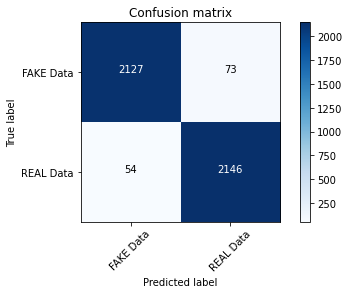

In [112]:
gb_clf.fit(X_train, Y_train)
gb_pred = gb_clf.predict(X_test)
score = metrics.accuracy_score(Y_test, gb_pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(Y_test, gb_pred)
plot_confusion_matrix(cm, classes=['FAKE Data', 'REAL Data'])
# calculate prediction
precision = precision_score(Y_test, gb_pred, average='binary')
print('Precision: %.3f' % precision)

In [35]:
# accuracy score on the training data
X_train_prediction = gb_clf.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.9726704545454545


In [107]:
print(classification_report(Y_test, gb_pred, digits=4))

              precision    recall  f1-score   support

           0     0.9752    0.9668    0.9710      2200
           1     0.9671    0.9755    0.9713      2200

    accuracy                         0.9711      4400
   macro avg     0.9712    0.9711    0.9711      4400
weighted avg     0.9712    0.9711    0.9711      4400



### 6-RandomForestClassifier

In [36]:
rf_clf = RandomForestClassifier(random_state=0)

accuracy:   0.974
Confusion matrix, without normalization


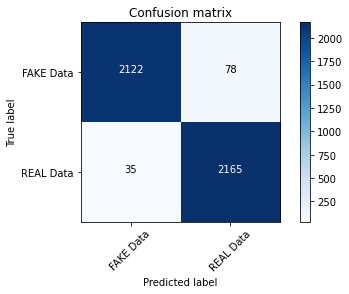

In [37]:
rf_clf.fit(X_train, Y_train)
rf_pred = rf_clf.predict(X_test)
score = metrics.accuracy_score(Y_test, rf_pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(Y_test, rf_pred)
plot_confusion_matrix(cm, classes=['FAKE Data', 'REAL Data'])

In [38]:
# accuracy score on the training data
X_train_prediction = rf_clf.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.9999431818181819


In [108]:
print(classification_report(Y_test, rf_pred, digits=4))

              precision    recall  f1-score   support

           0     0.9838    0.9645    0.9741      2200
           1     0.9652    0.9841    0.9746      2200

    accuracy                         0.9743      4400
   macro avg     0.9745    0.9743    0.9743      4400
weighted avg     0.9745    0.9743    0.9743      4400



### 7-Support Vector Machine(SVM)

In [41]:
svm_model = SVC(kernel='linear')

accuracy:   0.977
Confusion matrix, without normalization


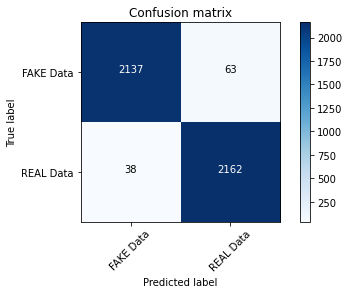

In [42]:
svm_model.fit(X_train, Y_train)
svm_pred = svm_model.predict(X_test)
score = metrics.accuracy_score(Y_test, svm_pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(Y_test, svm_pred)
plot_confusion_matrix(cm, classes=['FAKE Data', 'REAL Data'])

In [43]:
# accuracy score on the training data
X_train_prediction = svm_model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.9905113636363636


In [109]:
print(classification_report(Y_test, svm_pred, digits=4))

              precision    recall  f1-score   support

           0     0.9825    0.9714    0.9769      2200
           1     0.9717    0.9827    0.9772      2200

    accuracy                         0.9770      4400
   macro avg     0.9771    0.9770    0.9770      4400
weighted avg     0.9771    0.9770    0.9770      4400



### Explore Feature names and TfidfVectorizer Params

In [34]:
vectorizer.get_feature_names()[:20]

C:\Users\monak\anaconda3\envs\blhl\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['aaa',
 'aaaaaaaall',
 'aaaaaannnnnddddd',
 'aaaugghhhh',
 'aadii',
 'aah',
 'aahh',
 'aai',
 'aaj',
 'aakriti',
 'aalu',
 'aamer',
 'aamirkhan',
 'aap',
 'aapl',
 'aar',
 'aarogya',
 'aarogyasetapp',
 'aarogyasetu',
 'aaron']

In [35]:
vectorizer.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.float64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': None,
 'min_df': 1,
 'ngram_range': (1, 1),
 'norm': 'l2',
 'preprocessor': None,
 'smooth_idf': True,
 'stop_words': None,
 'strip_accents': None,
 'sublinear_tf': False,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'use_idf': True,
 'vocabulary': None}

In [36]:
## Get Features names
feature_names = vectorizer.get_feature_names()

In [38]:
classifier.coef_[0]

array([-10.15128759, -10.75196445, -10.37875815, ..., -10.32490541,
       -10.46274124, -10.75196445])

In [39]:
### Most real
sorted(zip(classifier.coef_[0], feature_names), reverse=True)[:20]

[(-4.36502833622872, 'coronaviru'),
 (-4.369554522688392, 'vaccin'),
 (-4.877261129039788, 'cure'),
 (-5.057421744221549, 'viru'),
 (-5.130912479973878, 'corona'),
 (-5.181031900804308, 'kill'),
 (-5.354819430848451, 'immun'),
 (-5.406216742919299, 'china'),
 (-5.488915682730884, 'gate'),
 (-5.640214795416515, 'bill'),
 (-5.642838136742552, 'bioweapon'),
 (-5.7503293122575, 'develop'),
 (-5.771699491467199, 'flu'),
 (-5.855726079749092, 'covid'),
 (-5.936935710639777, 'say'),
 (-5.988058296452884, 'like'),
 (-6.045510100683569, 'peopl'),
 (-6.06068498779904, 'us'),
 (-6.070768604744687, 'amp'),
 (-6.072395473200517, 'spread')]

In [42]:
### Most fake
sorted(zip(classifier.coef_[0], feature_names))[:50]

[(-10.751964445301098, 'aaaaaaaall'),
 (-10.751964445301098, 'aaj'),
 (-10.751964445301098, 'aakriti'),
 (-10.751964445301098, 'aamer'),
 (-10.751964445301098, 'aamirkhan'),
 (-10.751964445301098, 'aarogya'),
 (-10.751964445301098, 'aarogyasetapp'),
 (-10.751964445301098, 'aarogyasetu'),
 (-10.751964445301098, 'aaron'),
 (-10.751964445301098, 'aaronovitch'),
 (-10.751964445301098, 'aarp'),
 (-10.751964445301098, 'ababa'),
 (-10.751964445301098, 'abat'),
 (-10.751964445301098, 'abattoir'),
 (-10.751964445301098, 'abbott'),
 (-10.751964445301098, 'abbrevi'),
 (-10.751964445301098, 'abbv'),
 (-10.751964445301098, 'abbvi'),
 (-10.751964445301098, 'abdomen'),
 (-10.751964445301098, 'abet'),
 (-10.751964445301098, 'abhei'),
 (-10.751964445301098, 'abinash'),
 (-10.751964445301098, 'ableism'),
 (-10.751964445301098, 'aboard'),
 (-10.751964445301098, 'abolish'),
 (-10.751964445301098, 'abraham'),
 (-10.751964445301098, 'abromavich'),
 (-10.751964445301098, 'abrupt'),
 (-10.751964445301098, 'ab

In [48]:
X_new = X_test[6]

prediction = model.predict(X_new)
print(prediction)

if (prediction[0]==0):
  print('The news is Real')
else:
  print('The news is Fake')

[0]
The news is Real


### Model Testing With Manual Entry

In [114]:
def output_lable(n):
    if n == 1:
        return "Fake News"
    elif n == 0:
        return "Not A Fake News"
    
def manual_testing(news):
    testing_news = {"text":[news]}
    new_def_test = pd.DataFrame(testing_news)
    new_x_test = new_def_test["text"]
    new_xv_test = vectorizer.transform(new_x_test)
    pred_lr = lr_model.predict(new_xv_test)
    pred_mnb = mnb_clf.predict(new_xv_test)
    pred_pa = pa_clf.predict(new_xv_test)
    pred_dt = dt_clf.predict(new_xv_test)
    pred_gb = gb_clf.predict(new_xv_test)
    pred_rf = rf_clf.predict(new_xv_test)
    pred_svm = svm_model.predict(new_xv_test)

    return print("\n\nlr Prediction: {} \nmnb Prediction: {} \npa Prediction: {} \ndt Prediction: {} \ngb Prediction: {} \nrf Prediction: {} \nsvm Prediction: {}".format(output_lable(pred_lr[0]), 
                                                                                                              output_lable(pred_mnb[0]),
                                                                                                              output_lable(pred_pa[0]),
                                                                                                              output_lable(pred_dt[0]),
                                                                                                              output_lable(pred_gb[0]), 
                                                                                                              output_lable(pred_rf[0]),
                                                                                                              output_lable(pred_svm[0])))

In [115]:
news = str(input())
manual_testing(news)

 the bill amp melinda gates foundation predicted the coronavirus could kill m people like months ago lol




lr Prediction: Fake News 
mnb Prediction: Fake News 
pa Prediction: Fake News 
dt Prediction: Fake News 
gb Prediction: Fake News 
rf Prediction: Fake News 
svm Prediction: Fake News


In [116]:
news = str(input())
manual_testing(news)

 note to you need to update your graphic to if you have been to china south korea iran italy japan or washington state or oregon




lr Prediction: Not A Fake News 
mnb Prediction: Not A Fake News 
pa Prediction: Not A Fake News 
dt Prediction: Not A Fake News 
gb Prediction: Not A Fake News 
rf Prediction: Fake News 
svm Prediction: Not A Fake News
